# Predicting heart disease using machine learning

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation



# 1) Problem definition

> Given clinical parameters about a patient, can we predict if they have heart disease or not.


# 2) Data
> The data was gotten from a public source and was downloaded from <a href='https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data'>kaggle</a>


# 3) Evaluation 

>if we can reach a 95% accuracy at predicting wheter or not a patient has heart disease during the machine learning process, we will pursue the project

# 4) Features

> 1. age (Age of the patient in years)
> 2. sex (Male/Female)
> 3. cp chest pain type ([0 :typical angina, 1:atypical angina, 2:non-anginal, 3:asymptomatic])
> 4.trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
> 5. chol (serum cholesterol in mg/dl)
> 6. fbs (if fasting blood sugar > 120 mg/dl)
> 7.restecg (resting electrocardiographic results)
> 8.thalach: maximum heart rate achieved
> 9.exang: exercise-induced angina (True/ False)
> 10. oldpeak: ST depression induced by exercise relative to rest
> 11. slope: the slope of the peak exercise ST segment
> 12. ca: number of major vessels (0-3) colored by fluoroscopy
> 13. thal: [normal; fixed defect; reversible defect]
> 14. target : the predicted attribute


In [1]:
#importing necessary libraries 

#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve

# Load Data

In [2]:
df = pd.read_csv('../data/heart-disease.csv')
df.shape

(303, 14)

# EDA

The goal here is to find more about the data and become a sjudject expert on the data

1. what questions are you trying to solve?
2. what kind of data do we have and how do we treat different types
3. what's missing from the data and how do we deal with it?
4. what are the outliers and why should we care about them?
5. How can we add,remove or change features to get more out of thr data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# the distribution of the class
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:title={'center':'patients having heart disease or not'}>

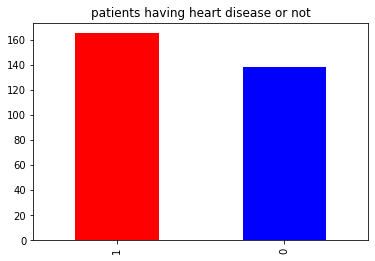

In [5]:
df['target'].value_counts().plot(kind ='bar',
                                 color=['r','b'],
                                title = 'patients having heart disease or not')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missin values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# chekcing for categorical colums
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Heart Disease frequency according to sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column to sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


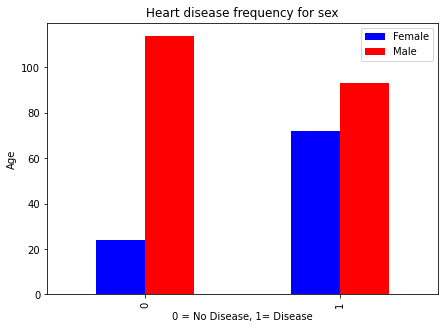

In [11]:
# plot of the sex and target column to see how 
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(7,5),
                                  color=['b','r'])
plt.title('Heart disease frequency for sex')
plt.xlabel('0 = No Disease, 1= Disease')
plt.ylabel('Age')
plt.legend(['Female','Male'])

# Age vs Max heart rate for Heart Disease

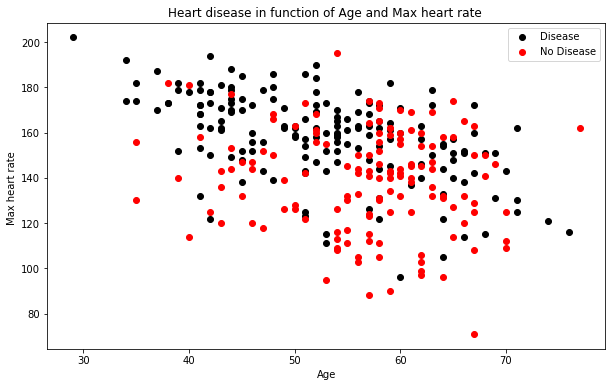

In [12]:
# create a fig 
plt.figure(figsize=(10,6))

#scatter plot of positive 
plt.scatter(df.age[df['target']==1],
           df.thalach[df.target==1],
           c='black')
plt.scatter(df.age[df['target']==0],
           df.thalach[df.target==0],
           c='red')
plt.title('Heart disease in function of Age and Max heart rate ')
plt.xlabel('Age')
plt.ylabel('Max heart rate ')
plt.legend(['Disease','No Disease']);


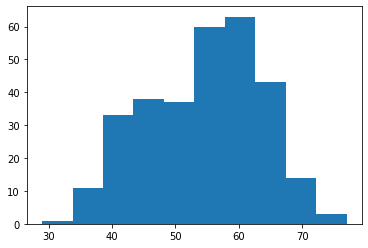

In [13]:
# check distribution of age 
plt.hist(df['age']);

# Heart disease frequency per chest pain type

cp chest pain type ([0 :typical angina, 1:atypical angina, 2:non-anginal, 3:asymptomatic])

In [14]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


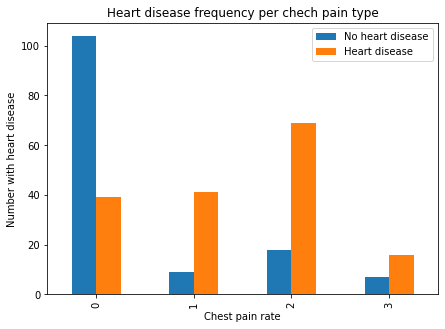

In [15]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(7,5))

plt.title('Heart disease frequency per chech pain type')
plt.xlabel('Chest pain rate')
plt.ylabel('Number with heart disease')
plt.legend(['No heart disease','Heart disease'])

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = df.drop('target',axis =1)
y = df['target']

In [18]:
# make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


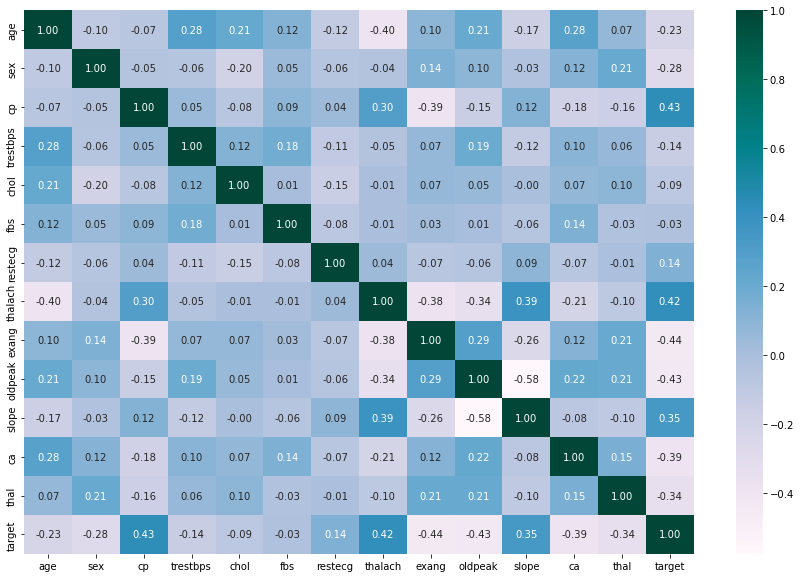

In [19]:
# correlation maxtrix with heatmat

corr_matrix = df.corr()
fig ,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                fmt='.2f',
                cmap='PuBuGn')             

# spit data into features and target

In [30]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Trying different models to find the best model that perfoms best

1. Logistic Regresssion
2. Random Forest Classifier
3. K-Nearest Neighbours Classifier

In [66]:
 # put models in a dictionary
    
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}   
# function to fit and score model
def fit_score_model(models,X_train,X_test,y_train,y_test):
    """fit and evaluates given machine learning models
    X_train = training data (no labels)
    X_test = testing data (no labels)
    y_train = training label
    y_test = testing label
    """
    np.random.seed(42)
    score = {}
    for name,model in models.items():
        fitted = model.fit(X_train,y_train)
        score[name] = fitted.score(X_test,y_test)
    return score


LogisticRegression()

LogisticRegression()

In [67]:
w = fit_score_model(models=models,
                    X_train=X_train,
                    X_test=X_test,
                    y_train=y_train,
                    y_test=y_test)
w

{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.7868852459016393}

In [77]:
# compare models
model_c = pd.DataFrame(w, index=['accuracy'] )
model_c

,Logistic Regression,KNN,Random Forest
accuracy,0.786885,0.590164,0.786885


In [84]:
# transpose the dataframe before plotting
model_cT =model_c.T

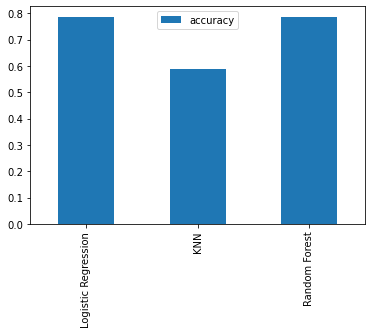

In [85]:
model_cT.plot(kind='bar');

# Investigating the models further 

Let's look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross_validation
* Rrecision
* Recall
* F1 score
* Classification report 
* Roc Curve
* Area under the curve (AUC)

## Hyperparameter tuning

# 1. By hand

In [114]:
# Let's tune KNN
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2)
train_scores = []
test_scores = []

#create a list of different values for n_neighbors
np.random.seed(42)
neighbors = range(1,21)
knn = KNeighborsClassifier()

# looping through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(X_train,y_train)
    train = knn.score(X_train,y_train)
    train_scores.append(train)
    test = knn.score(X_test,y_test)
    test_scores.append(test)

maximum score for test data is 75.41%


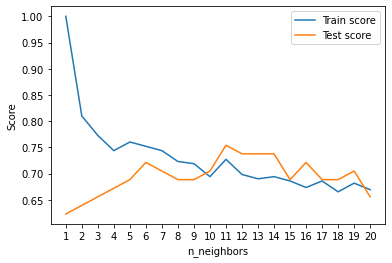

In [115]:
plt.plot(neighbors,train_scores, label='Train score')
plt.plot(neighbors,test_scores,label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend()
print(f"maximum score for test data is {max(test_scores)*100:.2f}%")

# 2. Tuning hyperparameters with RandomizedSearhCV 

* LogisticsRegression()
* RandomForestClassifier()


...... using CV

# hyperparameter tuning with grid for logistic regression

In [156]:
#create hyperparameter grid
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

In [157]:
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
log_reg_rs = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                                verbose=True)

In [158]:
log_reg_rs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [160]:
log_reg_rs.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [169]:
log_reg_rs.score(X_train,y_train)

0.859504132231405

log_reg_rs.score(X_test,y_test)

# hyperparameter tuning with grid for RandomForestClassifier

In [163]:
# create  hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(10,1000,50),
          'max_depth':['None',3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}


# fit random hyperparameter search model for logisticRegression
rf_grid_rs = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fit the random hyperparameter search model
rf_grid_rs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/hardey/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hardey/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hardey/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/Users/hardey/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': ['None', 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [164]:
rf_grid_rs.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [165]:
rf_grid_rs.score(X_train,y_train)

0.8553719008264463

In [168]:
w

{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.7868852459016393}

# 3. Tuning hyperparameters with GridSearhCV 

since LogisticsRegression regression provodes the best score so far, we will try to imporve it again by using GridSearchCV..

In [174]:
#create hyperparameter grid
log_reg_grid = {'C': np.logspace(-4,4,30),
               'solver': ['liblinear']}


# setup random hyperparameter search for LogisticRegression
log_reg_gs = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                                verbose=True)

# fit the hyperparameter search model
log_reg_gs.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [175]:
log_reg_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [179]:
#evaluate the model
log_reg_gs.score(X_test,y_test)

0.8852459016393442

# Evaluating the tuned machine learning clasifier beyond accuracy

* ROC curve and AUC score
* confusion matrix
* classification report
* precision
* recall
* F1 - score

.... with cross-validation

In [186]:
y_preds = log_reg_gs.predict(X_test)
y_preds 

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

/Users/hardey/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


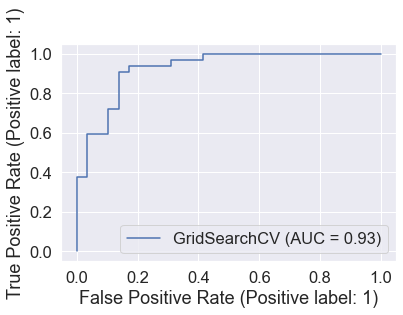

In [190]:
# plot ROC curve and calculate AUC metric
plot_roc_curve(log_reg_gs,X_test,y_test)

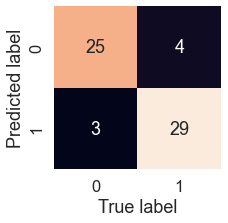

In [196]:
# confusion matrix
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False ) #remove the color bar
    plt.xlabel("True label") # predictions go on the x-axis
    plt.ylabel("Predicted label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [199]:
# classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [9]:
w = pd.read_csv('../data/house.csv')

In [10]:
w.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [45]:
#importing necessary libraries 

#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor



from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve

In [13]:
w.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [14]:
w.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [15]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
X = w[features]
y = w['target']

# split data into train and test

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
X.shape , y.shape

((20640, 4), (20640,))

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [48]:
models = {'Reg':LinearRegression(),
          'Lasso':Lasso(), 
          'Ridge':Ridge(), 
          'ElasticNet':ElasticNet(),
          'RandomForestRegressor':RandomForestRegressor()}

In [56]:
def train_test_score(X_train,X_test,y_train,y_test):
    final_score = []
    for name , model in models.items():
        train_dict = {}
        test_dict = {}
        fitted = model.fit(X_train,y_train)
        train_score = model.score(X_train,y_train)
        train_dict[name] = train_score
        final_score.append(train_dict)
        test_score  = model.score(X_test,y_test)
        test_dict[name] = test_score
        final_score.append(test_dict)
    return final_score

In [57]:
train_test_score(X_train,X_test,y_train,y_test)

[{'Reg': 0.5374191273651999},
 {'Reg': 0.533639161016787},
 {'Lasso': 0.283610184511331},
 {'Lasso': 0.29134889281547927},
 {'Ridge': 0.5374190334632971},
 {'Ridge': 0.5336508143172857},
 {'ElasticNet': 0.4201803166728173},
 {'ElasticNet': 0.4317114312925284},
 {'RandomForestRegressor': 0.9441449912505772},
 {'RandomForestRegressor': 0.6078529065329838}]

<AxesSubplot:>

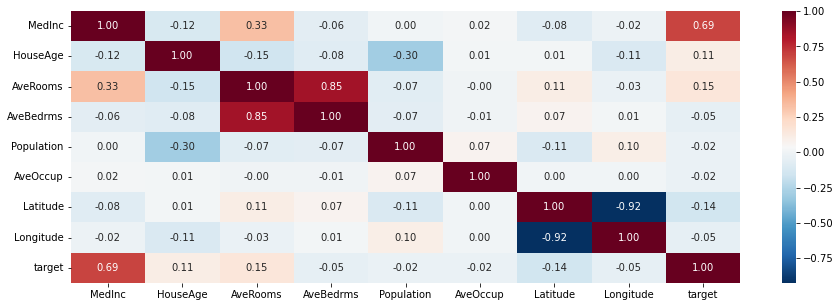

In [67]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(w.corr(), 
           cmap='RdBu_r', 
           annot = True,
           fmt='.2f',)

<img src='../images/car-photo.png'>

In [91]:
w.hist(figsize=(17,1), xrot=-45);

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [75]:
data = plt.imread('../images/car-photo.png')

In [92]:
l = [i for i in range(1000000)]
w = np.arange(1000000)

In [93]:
%timeit sum(l)
%timeit np.sum(w)

6.49 ms ± 421 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
768 µs ± 48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
data = pd.readcsv('')